# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.214878e+01     1.873292e+01
 * time: 0.004190921783447266
     1     6.063117e+01     1.027566e+01
 * time: 0.13277697563171387
     2     5.449055e+01     1.493817e+01
 * time: 0.14993691444396973
     3     4.018246e+01     1.085139e+01
 * time: 0.17427587509155273
     4     3.222568e+01     1.018185e+01
 * time: 0.1974778175354004
     5     1.288730e+01     2.916323e+00
 * time: 0.22057485580444336
     6     9.940551e+00     2.795299e+00
 * time: 0.2373979091644287
     7     8.462686e+00     2.089573e+00
 * time: 0.2538638114929199
     8     7.396793e+00     2.585349e+00
 * time: 0.2684359550476074
     9     7.342641e+00     3.905675e+00
 * time: 0.2827179431915283
    10     6.901193e+00     2.876217e+00
 * time: 0.29630184173583984
    11     6.523158e+00     1.812496e+00
 * time: 0.3101627826690674
    12     6.249740e+00     1.677992e+00
 * time: 0.3800947666168213
    13     6.075833e+00     1.797023e+00
 * time: 0.394

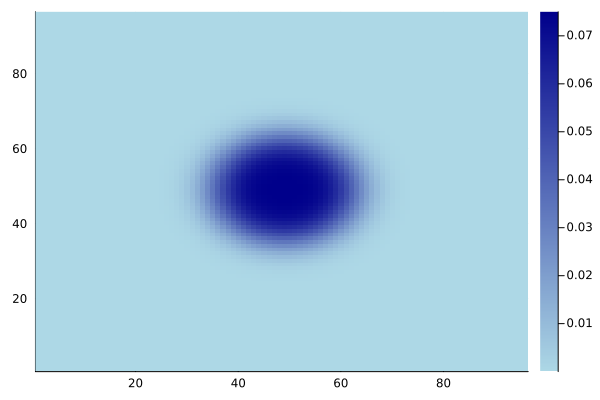

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)